# Подгрузка

In [9]:
import pickle
import os

path_to_directory = 'parser/data'
files =  os.listdir(path_to_directory)

files = [item for item in files if '.pickle' in item]
files

['info_0_10000.pickle',
 'info_10001_10096.pickle',
 'info_10096_11657.pickle',
 'info_11657_11900.pickle',
 'info_11900_11959.pickle',
 'info_11959_12645.pickle',
 'info_12646_12796.pickle',
 'info_12797_13564.pickle',
 'info_13565_14017.pickle',
 'info_14018_15071.pickle',
 'info_15072_17924.pickle',
 'info_17925_18898.pickle',
 'info_18899_19416.pickle',
 'info_19417_19755.pickle',
 'info_19756_21105.pickle',
 'info_25000_25664.pickle',
 'info_25664_26397.pickle',
 'info_26397_26496.pickle',
 'info_26496_26556.pickle',
 'info_26556_26624.pickle',
 'info_26624_26768.pickle',
 'info_26768_26836.pickle',
 'info_26836_26916.pickle',
 'info_26917_26961.pickle',
 'info_26961_27020.pickle',
 'info_27020_27183.pickle',
 'info_27183_27714.pickle',
 'info_27714_27894.pickle',
 'info_27894_28019.pickle',
 'info_28019_28269.pickle',
 'info_28269_28361.pickle',
 'info_28361_28587.pickle',
 'info_28587_28640.pickle',
 'info_28640_29001.pickle',
 'info_29001_29129.pickle',
 'info_29129_29188.pickl

In [11]:
data_real = [ ]

for file in files:
    with open('parser/data/' + file, 'rb') as f:
        data_new = pickle.load(f)
        data_real.extend(data_new)

# Предобработка данных

In [12]:
import pandas as pd
df = pd.DataFrame(data_real)

df = df.drop_duplicates(subset=['href'])
df.shape

(35109, 40)

In [13]:
df.head(2) #.tail()

,Тип жилья,Площадь комнат,Санузел,Балкон/лоджия,Ремонт,Вид из окон,Год постройки,Тип дома,Тип перекрытий,Подъезды,...,Планировка,Газоснабжение,Строительная серия,Отделка,Срок сдачи,Комнат в продажу,Всего комнат в квартире,Площадь комнаты,Комната,Размер доли
0,Вторичка,21-14-11 м²,1 раздельный,1 лоджия,Евроремонт,Во двор,2002,Монолитный,Железобетонные,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Вторичка,NaN,2 совмещенных,1 балкон,Без ремонта,NaN,2017,Монолитный,Железобетонные,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35109 entries, 0 to 56075
Data columns (total 40 columns):
Тип жилья                  35109 non-null object
Площадь комнат             22946 non-null object
Санузел                    30941 non-null object
Балкон/лоджия              20907 non-null object
Ремонт                     25126 non-null object
Вид из окон                25229 non-null object
Год постройки              24376 non-null object
Тип дома                   26045 non-null object
Тип перекрытий             22140 non-null object
Подъезды                   23503 non-null object
Лифты                      34196 non-null object
Отопление                  22521 non-null object
Аварийность                24631 non-null object
Парковка                   16778 non-null object
Мусоропровод               15772 non-null object
цена                       35109 non-null int64
описание                   35109 non-null object
Общая                      35108 non-null object
Жилая     

In [15]:
df.shape

(35109, 40)

In [16]:
df['цена'].hist(bins=50);

In [17]:
df[df['цена'] > 2e+9]

,Тип жилья,Площадь комнат,Санузел,Балкон/лоджия,Ремонт,Вид из окон,Год постройки,Тип дома,Тип перекрытий,Подъезды,...,Планировка,Газоснабжение,Строительная серия,Отделка,Срок сдачи,Комнат в продажу,Всего комнат в квартире,Площадь комнаты,Комната,Размер доли
718,Вторичка Пентхаус,NaN,NaN,"4 балкона, 1 лоджия",Без ремонта,На улицу и двор,2009,Кирпичный,Смешанные,2,...,Смежно-изолированная,NaN,С-222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11134,Вторичка,NaN,4 совмещенных,1 лоджия,Без ремонта,На улицу и двор,2009,Кирпичный,Смешанные,2,...,NaN,NaN,С-222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30070,Вторичка,NaN,"4 совмещенных, 4 раздельных","1 балкон, 1 лоджия",Без ремонта,На улицу и двор,2009,Кирпичный,Смешанные,2,...,NaN,NaN,С-222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39867,Вторичка,NaN,NaN,4 балкона,Косметический,На улицу и двор,NaN,Кирпичный,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43886,Вторичка Апартаменты,NaN,"4 совмещенных, 2 раздельных",NaN,Без ремонта,На улицу и двор,NaN,Монолитный,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50216,Вторичка,NaN,4 раздельных,"1 балкон, 1 лоджия",NaN,NaN,2009,Кирпичный,Смешанные,2,...,NaN,NaN,С-222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53524,Вторичка,NaN,NaN,NaN,Без ремонта,NaN,2009,Монолитный,NaN,1,...,Смежно-изолированная,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


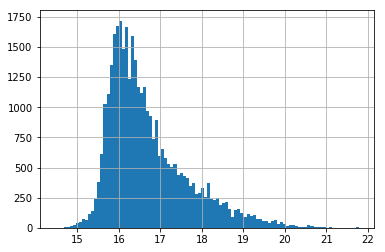

In [18]:
import numpy as np
df['цена'].apply(lambda w: np.log(w)).hist(bins=100);

# Предобработка данных

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [20]:
import pandas as pd
df = pd.DataFrame(data_real)

df = df.drop_duplicates(subset=['href'])
df.reset_index(drop=True, inplace=True)

df.shape

(35109, 40)

In [21]:
dff = pd.DataFrame()  # тут хорошие данные

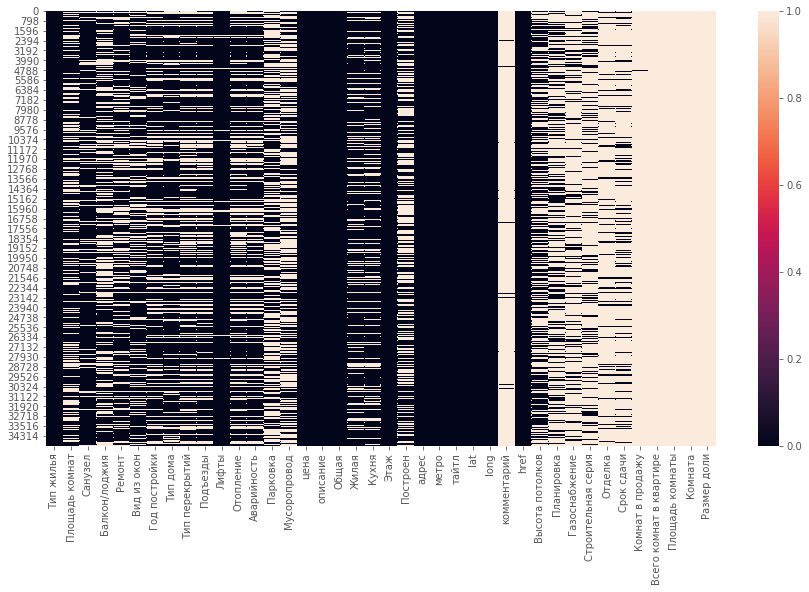

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull());

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


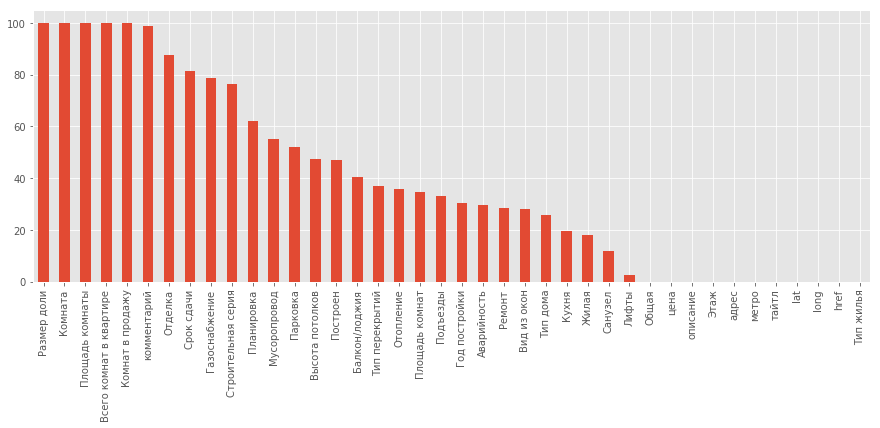

In [23]:
plt.figure(figsize=(15,5))
(100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False).plot('bar');

Выкидываем неинформативные признаки

In [24]:
df.drop(['Аварийность', 'Комнат в продажу', 'Размер доли'], axis=1, inplace=True)

# пока что выкинем их из рассмотрения, потом если чё вренём
df.drop('Строительная серия', axis=1, inplace=True)

1. Переменная попадает ли дом на реиновацию

In [25]:
df['комментарий'].unique()

array([None,
       'Дом под сносПо результатам голосования жильцов дом включен в программу реновации и будет снесен'],
      dtype=object)

In [26]:
dff['is_reinovation'] = (1 - df['комментарий'].isnull())

2. Категориальные переменные

In [27]:
tradeoff = 0.02*df.shape[0]

In [28]:
import re

def f_create(reg):
    def f(w):
        if w is np.nan:
            return np.nan
        else:
            x = re.findall(reg, w)
            if len(x) == 0:
                return np.nan
            else:
                return str(x[0]) 
    return f

# пример работы фабрики функций
f = f_create('(\d) л')
f('1 балкон, 1 лоджия')

'1'

In [29]:
df['балконы'] = df['Балкон/лоджия'].apply(f_create('(\d) б'))
df['лоджии'] = df['Балкон/лоджия'].apply(f_create('(\d) л'))

df['санузлы_раздельные'] = df['Санузел'].apply(f_create('(\d) р'))
df['санузлы_совместные'] = df['Санузел'].apply(f_create('(\d) с'))

df['лифты_пас'] = df['Лифты'].apply(f_create('(\d) п'))
df['лифты_гр'] = df['Лифты'].apply(f_create('(\d) г'))

# df[['Балкон/лоджия', 'балконы','лоджии']].sample(10)
df.drop(['Балкон/лоджия', 'Санузел', 'Лифты'], axis=1, inplace=True)

In [30]:
df['комнаты'] = df['тайтл'].apply(lambda w: w.split(' ')[0]).value_counts()

Теперь считаем частоты!        

In [31]:
var_cat = ['Отделка', 'Газоснабжение',
'Планировка', 'Мусоропровод', 'Парковка',
'Тип перекрытий', 'Отопление', 'Вид из окон',
'Ремонт', 'Тип дома', 'Тип жилья',

'балконы', 'лоджии',   'санузлы_раздельные',
'санузлы_совместные', 'лифты_пас', 'лифты_гр',
          
'комнаты'] 

In [32]:
def freq_less_trade(x):
    freq = df[x].value_counts()
    bad_value = freq[freq < tradeoff].index
    df[x] = df[x].apply(lambda w: 'другое' if w in bad_value else w)

for x in var_cat:
    freq_less_trade(x)

In [33]:
df['лифты_гр'].value_counts()

1         12757
2          2358
другое      331
Name: лифты_гр, dtype: int64

3. Непрерывные переменные

In [34]:
def ceil(w):
    if w is np.nan:
        return np.nan
    else:
        y = float(re.sub('[, ]', '.', w)[:-2])
        if y > 10 and y < 100:
            return y / 10
        elif y >= 100:
            return y/100
        elif y < 2:
            return np.nan
        else:
            return y
    
dff['Высота потолков'] = df['Высота потолков'].apply(ceil)

In [35]:
dff['Подъезды'] = df['Подъезды'].apply(lambda w: w if w is np.nan else int(w))
dff.loc[dff['Подъезды'] > 30, 'Подъезды'] = np.nan

In [36]:
def sq(w):
    if w is np.nan:
        return np.nan
    else:
        y = re.sub(',', '.', w)[:-2]
        y = re.sub(' ', '', y)
        return float(y)
    
dff['Жилая'] = df['Жилая'].apply(sq)
dff['Кухня'] = df['Кухня'].apply(sq)
dff['Общая'] = df['Общая'].apply(sq)

In [28]:
# Дз: фабрика функций, mean max median, len 
 
# def sq_rooms():
#     def f(w):
#         if w is np.nan:
#             return np.nan
#         else:
#             y = re.sub(',', '.', w)[:-2]
#             y = re.sub('[ \(\)]', '', y)
#             y = [float(item) for item in re.split('[-+/]', y)]
#             return np.mean(y)
#     return f

# f = sq_rooms()
# df['Площадь комнат'].apply(f)

In [37]:
dff['Этаж'] = df['Этаж'].apply(lambda w: int(w.split(' из ')[0]))
dff['Этажность'] = df['Этаж'].apply(lambda w: int(w.split(' из ')[1]))
dff['первый_этаж'] = df['Этаж'].apply(lambda w: 1*(w.split(' из ')[0] == '1'))
dff['последний_этаж'] = df['Этаж'].apply(lambda w: 1*(w.split(' из ')[0] == w.split(' из ')[1]))

In [ ]:
# Дз: распарсить переменную со станциями и временем (пешком/на машине) на мног переменных 
#
# - минимально пешком/на машине
# - максимално 
# - количество станций метро рядом
# - название ближайшей станции если пешком 
# - название ближайшей станции если на машине 
# (если две с одинаковым берем любую) 

In [50]:
def min_walk_metro(l):
    new = []
    for j in l:
        if 'пешком' in j:
            new.append(int(re.findall('(\d*) мин. пешком',j)[0]))
    if len(new) != 0:
        return min(new)  
    else:
        return np.nan
    
def min_transport_metro(l):
    new = []
    for j in l:
        if 'транспорте' in j:
            new.append(int(re.findall('(\d*) мин. на транспорте',j)[0]))
    if len(new) != 0:
        return min(new)  
    else:
        return np.nan
    
dff['metro_walk_min'] = df['метро'].apply(lambda x: min_walk_metro(x))
dff['metro_auto_min'] = df['метро'].apply(lambda x: min_transport_metro(x))


In [132]:
def stations(mod):
    def find_stations(l, mod=mod):
        l = [re.findall("([ А-Яа-я0-9-.]*) ⋅[ А-Яа-я0-9.]* " + mod, item) for item in l]
        s = [ ]
        for item in l:
            if len(item) == 0:
                continue
            else:
                s.append(item[0].split("откроется")[0])
        return ','.join(s)
    return find_stations

find_walk_st = stations("пешком")
find_auto_st = stations("на транспорте")

dff['stations_walk'] = df['метро'].apply(find_walk_st)
dff['stations_auto'] = df['метро'].apply(find_auto_st)

4. Время 

In [136]:
dff['возраст'] = df['Год постройки'].apply(lambda w: w if w is np.nan else int(w))
dff.loc[dff['возраст'] < 1900, 'возраст'] = np.nan
dff['возраст'] =  2020 - dff['возраст']

In [137]:
df['год сдачи'] = df['Срок сдачи'].apply(lambda w: w if w is np.nan else w.split(' ')[-1])
df['квартал'] = df['Срок сдачи'].apply(lambda w: w if w is np.nan else int(w.split(' ')[0]))

df.loc[df['год сдачи'] < '2020', 'квартал'] = np.nan
df.loc[df['год сдачи'] < '2020', 'год сдачи'] = np.nan
df.loc[df['квартал'] >= 5, 'квартал'] = 1

df['квартал'].replace({1:'01', 2: '04', 3: '07', 4: '10'}, inplace=True)
df['срок сдачи'] = df['год сдачи'].astype(str) + '-' + df['квартал']

In [138]:
df['срок сдачи'].dropna()

17       2021-10
23       2021-07
31       2022-04
37       2020-10
40       2022-04
          ...   
35071    2021-04
35087    2021-04
35091    2021-07
35095    2021-10
35099    2022-04
Name: срок сдачи, Length: 5085, dtype: object

In [139]:
from datetime import datetime  # пакет для работы с датами

In [140]:
x = '2021-04'
y = datetime.strptime(x, "%Y-%m")
y

datetime.datetime(2021, 4, 1, 0, 0)

In [141]:
y1 = datetime.strptime('2020-01', "%Y-%m")
(y - y1).days // 30

15

In [142]:
def get_time_delta(x):
    if x is np.nan:
        return x
    else:
        y = datetime.strptime(x, "%Y-%m")
        y1 = datetime.strptime('2020-01', "%Y-%m")
        return (y - y1).days // 30
    
dff['срок сдачи'] = df['срок сдачи'].apply(get_time_delta)

# Финалочка 

In [143]:
dff[var_cat] = df[var_cat]
dff.head()

,is_reinovation,Высота потолков,Подъезды,Жилая,Кухня,Общая,Этаж,Этажность,первый_этаж,последний_этаж,...,Ремонт,Тип дома,Тип жилья,балконы,лоджии,санузлы_раздельные,санузлы_совместные,лифты_пас,лифты_гр,комнаты
0,0,NaN,5.0,46.0,13.0,82.0,11,19,0,0,...,Евроремонт,Монолитный,Вторичка,NaN,1,1,NaN,2,1,NaN
1,0,2.64,2.0,NaN,NaN,103.3,20,39,0,0,...,Без ремонта,Монолитный,Вторичка,1,NaN,NaN,2,NaN,NaN,NaN
2,0,3.40,24.0,113.0,15.0,167.0,10,12,0,0,...,Дизайнерский,Кирпичный,Вторичка,1,1,1,NaN,1,NaN,NaN
3,0,2.70,6.0,50.6,7.7,76.4,5,5,0,1,...,Евроремонт,Кирпичный,Вторичка,1,NaN,NaN,1,NaN,NaN,NaN
4,0,NaN,NaN,41.0,25.0,119.0,4,6,0,0,...,Дизайнерский,Монолитный,Вторичка Апартаменты,1,NaN,2,NaN,1,NaN,NaN


In [144]:
var_cat = var_cat + ['is_reinovation', 'первый_этаж', 'последний_этаж']
var_real = list(set(dff.columns) - set(var_cat))

var_teh = ['адрес', 'описание', 'href', 'lat', 'long']
target = 'цена'

In [145]:
dff[var_teh] = df[var_teh]
dff[target] =  df[target]

In [146]:
dff.dtypes

is_reinovation          int64
Высота потолков       float64
Подъезды              float64
Жилая                 float64
Кухня                 float64
Общая                 float64
Этаж                    int64
Этажность               int64
первый_этаж             int64
последний_этаж          int64
metro_walk_min        float64
metro_auto_min        float64
stations_walk          object
stations_auto          object
возраст               float64
срок сдачи            float64
Отделка                object
Газоснабжение          object
Планировка             object
Мусоропровод           object
Парковка               object
Тип перекрытий         object
Отопление              object
Вид из окон            object
Ремонт                 object
Тип дома               object
Тип жилья              object
балконы                object
лоджии                 object
санузлы_раздельные     object
санузлы_совместные     object
лифты_пас              object
лифты_гр               object
комнаты   

In [147]:
dff.shape

(35109, 40)

In [148]:
dff.to_csv('cian_data_v1.csv', sep='\t', index=None)

In [ ]:
var_cat = ['Отделка', 'Газоснабжение',
'Планировка', 'Мусоропровод', 'Парковка',
'Тип перекрытий', 'Отопление', 'Вид из окон',
'Ремонт', 'Тип дома', 'Тип жилья',

'балконы', 'лоджии',   'санузлы_раздельные',
'санузлы_совместные', 'лифты_пас', 'лифты_гр',
          
'комнаты'] 

var_cat = var_cat + ['is_reinovation', 'первый_этаж', 'последний_этаж']
var_real = list(set(dff.columns) - set(var_cat))

var_teh = ['адрес', 'описание', 'href', 'lat', 'long']
target = 'цена'


# dff = pd.get_dummies(dff)#, dummy_na=True, drop_first=True)
# dff.head()

dff[var_real + [target]].hist(figsize=(15,12));

plt.figure(figsize=(15,12))
sns.pairplot(dff[var_real + [target]])